In [37]:
import numpy as np
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
X, y = make_blobs(centers=2, n_samples=500, )
X.shape

(500, 2)

In [54]:
X, Xp, y, yp = train_test_split(X, y, test_size=0.01, random_state=42)

In [55]:
X[0]

array([-3.20116368, -4.85979173])

In [56]:
y[0]

0

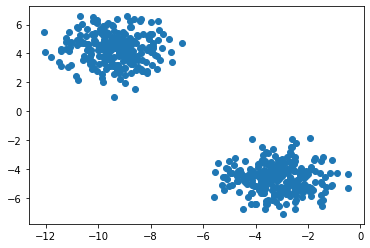

In [57]:
plt.scatter([x[0] for x in X], [x[1] for x in X])

In [43]:
class LinearBase(object):
    
    """Base class for linear models"""
    
    def __init__(self, learning_rate, n_iter):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Fit using gradient descent.
        """
        for i in range(self.n_iter):

            error = self._error(X, y, self.theta)

            # update gradients 
            gradients = 2 / self.m * X.T.dot(error)
        
            # update theta 
            self.theta -= self.learning_rate * gradients
            
    def _error(self, X, y, theta):
        return X.dot(theta) - y.reshape(-1,1)

    def predict(self, X):
        xm, xn = X.shape
        
        if not self.fitted:
            raise Exception(f"{__class__.__name__} is not yet fitted.")
            
        if len(X.shape) == 1:
            X = X.reshape(1,-1)
            
        if xn != self.n:
            raise Exception(f"Input data shape must be equal to fit data shape {self.n}")
            
        if xn == 1:
            return X.dot(self.coefs) + self.intercept
        
        return X.dot(self.coefs)
    
    def __repr__(self):
        if self.fitted:
            return f"coefficients: {self.coefs}, \n\n intercept: {self.intercept}"
        return self.__class__.__name__


In [44]:
class LogReg(LinearBase):

    def __init__(self, learning_rate = 0.01, n_iter = 1000):
        super().__init__(learning_rate, n_iter)
        self.coefs = None
        self.intercept = None
        self.fitted = False 

    def fit(self, X, y):
        
        self.m, self.n = X.shape
                 
        # add 1s for bias 
        xb = np.hstack((np.ones((self.m, 1)), X))

        # initiate coefs
        self.theta = np.ones((xb.shape[1], 1))
        
        for step in range(self.n_iter):
            
  
            error = self.sigmoid(xb.dot(self.theta)) - y.reshape(-1,1)

            # update gradients 
            gradients = 2 / self.m * xb.T.dot(error)
        
            # update theta 
            self.theta -= self.learning_rate * gradients
            
        
        self.coefs = self.theta[1:].flatten()
        self.intercept = self.theta[0].flatten()
        self.fitted = True
        return self
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z)) 

    def predict_proba(self, X):
        return self.sigmoid(super().predict(X))

    def predict(self, X, threshold = .5):
        return np.where(self.predict_proba(X) > threshold, 1, 0)

In [45]:
# X, y = make_regression(100, 2, noise = 1)

In [46]:
l = LogReg(n_iter=10000).fit(X, y)
l

coefficients: [ 2.02846225 -0.10505343], 

 intercept: [0.71834417]

In [47]:
l.predict_proba(Xp)

array([2.88714598e-04, 1.01157256e-04, 3.47357147e-06, 2.34662364e-06,
       1.81975980e-05, 1.56044961e-04, 9.34772390e-05, 9.99999929e-01,
       9.99999883e-01, 9.99999683e-01])

In [48]:
preds = l.predict(Xp)
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [49]:
logit = LogisticRegression().fit(X, y)

/Users/tommywatts/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
logit.coef_, logit.intercept_

(array([[ 1.4305103 , -0.35089206]]), array([-0.18161648]))

In [51]:
logit.predict_proba(Xp)

array([[9.98737951e-01, 1.26204857e-03],
       [9.99336976e-01, 6.63024085e-04],
       [9.99898215e-01, 1.01784972e-04],
       [9.99959436e-01, 4.05636393e-05],
       [9.99780017e-01, 2.19982813e-04],
       [9.99257929e-01, 7.42071076e-04],
       [9.99565029e-01, 4.34971255e-04],
       [6.15022633e-05, 9.99938498e-01],
       [1.49706609e-04, 9.99850293e-01],
       [3.32733473e-04, 9.99667267e-01]])

In [52]:
logit.predict(Xp)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])